In [26]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [27]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv/
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
fc-cache: invalid option -- '/'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               di

In [84]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.rc('font', size=17)  

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
def listToString(str_list):
    result = ""
    for s in str_list:
        result += s + " "
    return result.strip()

# Quiz
pdf 데이터 불러오기

단어빈도
워드클라우드
제일 많이나온거

In [30]:

#방법1
# pdf 파일
!pip install tika

In [31]:
from tika import parser # pip install tika
url='http://wolfpack.hnu.ac.kr/big_data/data/%ED%95%9C%EA%B8%80%EC%84%B1%EA%B2%BD_%EC%8B%A0%EC%95%BD.pdf'
raw = parser.from_file(url)
type(raw),type(raw['content'])

2022-04-03 14:45:53,413 [MainThread  ] [INFO ]  Retrieving http://wolfpack.hnu.ac.kr/big_data/data/%ED%95%9C%EA%B8%80%EC%84%B1%EA%B2%BD_%EC%8B%A0%EC%95%BD.pdf to /tmp/big_data-data-ed-95-9c-ea-b8-80-ec-84-b1-ea-b2-bd_-ec-8b-a0-ec-95-bd.pdf.


(dict, str)

In [32]:
test_str=raw['content']
string = test_str.strip('\n')
string = string.strip('\n')
bible=string.split('\n\n')

In [33]:
bible

['(마1:8)아사는 여호사밧을 낳고 여호사밧은 요람을 낳고 요람은 웃시야를 낳고',
 '(마1:9)웃시야는 요담을 낳고 요담은 아하스를 낳고 아하스는 히스기야를 낳고',
 '(마1:10)히스기야는 므낫세를 낳고 므낫세는 아몬을 낳고 아몬은 요시야를 낳고',
 '(마1:11)바벨론으로 이거할 때에 요시야는 여고냐와 그의 형제를 낳으니라',
 '(마1:12)바벨론으로 이거한 후에 여고냐는 스알디엘을 낳고 스알디엘은 스룹바벨을 낳고',
 '(마1:13)스룹바벨은 아비훗을 낳고 아비훗은 엘리아김을 낳고 엘리아김은 아소르를 낳고',
 '(마1:14)아소르는 사독을 낳고 사독은 아킴를 낳고 아킴은 엘리웃을 낳고',
 '(마1:15)엘리웃은 엘르아살을 낳고 엘르아살은 맛단을 낳고 맛단은 야곱을 낳고',
 '(마1:16)야곱은 마리아의 남편 요셉을 낳았으니 마리아에게서 그리스도라 칭하는 예수가 나시니라',
 '(마1:17)그런즉 모든  수가 아브라함부터 다윗까지 열네 요 다윗부터 바벨론으로 이거할 때까지 ',
 '열네 요 바벨론으로 이거한 후부터 그리스도까지 열네 러라',
 '(마1:18)예수 그리스도의 나심은 이러하니라 그 모친 마리아가 요셉과 정혼하고 동거하기 전에 성령으',
 '로 잉태된 것이 나타났더니',
 '(마1:19)그 남편 요셉은 의로운 사람이라 저를 드러내지 아니하고 가만히 끊고자 하여',
 '(마1:20)이 일을 생각할 때에 주의 사자가 현몽하여 가로되 다윗의 자손 요셉아 네 아내 마리아 데려',
 '오기를 무서워 말라 저에게 잉태된 자는 성령으로 된 것이라',
 '(마1:21)아들을 낳으리니 이름을 예수라 하라 이는 그가 자기 백성을 저희 죄에서 구원할 자이심이라 ',
 '하니라',
 '(마1:22)이 모든 일의 된 것은 주께서 선지자로 하신 말씀을 이루려 하심이니 가라사',
 '(마1:23)보라 처녀가 잉태하여 아들을 낳을 것이요 그 이름은 임마누엘이라 하리라 하셨으니 이를 번',
 '역한즉 하나님이 우리와 함께 계시다 함이라',
 '(마1:24)요셉

#데이터프레임 만들기

In [34]:
import pandas as pd
df_bible=pd.DataFrame(bible,columns=["verse"])
df_bible.head(10)

,verse
0,(마1:8)아사는 여호사밧을 낳고 여호사밧은 요람을 낳고 요람은 웃시야를 낳고
1,(마1:9)웃시야는 요담을 낳고 요담은 아하스를 낳고 아하스는 히스기야를 낳고
2,(마1:10)히스기야는 므낫세를 낳고 므낫세는 아몬을 낳고 아몬은 요시야를 낳고
3,(마1:11)바벨론으로 이거할 때에 요시야는 여고냐와 그의 형제를 낳으니라
4,(마1:12)바벨론으로 이거한 후에 여고냐는 스알디엘을 낳고 스알디엘은 스룹바벨을 낳고
5,(마1:13)스룹바벨은 아비훗을 낳고 아비훗은 엘리아김을 낳고 엘리아김은 아소르를 낳고
6,(마1:14)아소르는 사독을 낳고 사독은 아킴를 낳고 아킴은 엘리웃을 낳고
7,(마1:15)엘리웃은 엘르아살을 낳고 엘르아살은 맛단을 낳고 맛단은 야곱을 낳고
8,(마1:16)야곱은 마리아의 남편 요셉을 낳았으니 마리아에게서 그리스도라 칭하는 예...
9,(마1:17)그런즉 모든 수가 아브라함부터 다윗까지 열네 요 다윗부터 바벨론으로 ...


#단어빈도

In [35]:
!pip install konlpy

In [36]:
text=[]
from konlpy.tag import Okt
okt=Okt()
for k in range(0,df_bible.shape[0]):
  okt.morphs(str(df_bible.iloc[k]))
  text.append(okt.nouns(str(df_bible.iloc[k])))

In [85]:
file=open('/content/drive/MyDrive/Colab Notebooks/감성분석_이명기/stopwords.txt', 'r',encoding='cp949')
stopword = file.readlines()
stopword = stopword[0]+' 고전'+' 고후'+' 하리'+' 하라'+' 자가'+' 하니'+' 가운데'+' 모든'+' 보고'+' 느니라'+' 딤전'+' 이제'+' 거기'+' 가지'+' 저가'
file.close()
stopword_wordcloud=stopword[0].split(' ')

In [86]:
import itertools
import collections
all_words=list(itertools.chain(*text))
stop_words = stopword
# stop_words = set(stop_words.split(' '))
words = [word for word in all_words if not word in stop_words]
words = [n for n in words if len(n) > 1]
words[0:10]

['아사', '여호사밧', '여호사밧', '요람', '요람', '웃시야', '웃시야', '요담', '요담', '아하스']

In [87]:
word_count=collections.Counter(words)
word_freq=pd.DataFrame(word_count.most_common(30),columns=['words', 'count']) # 100 
word_freq=word_freq.dropna() #
word_freq=word_freq[word_freq['words'].str.len()>=2] #
word_freq

,words,count
0,예수,1368
1,하나님,1173
2,그리스도,465
3,말씀,382
4,사랑,309
5,제자,309
6,형제,286
7,아버지,276
8,아들,233
9,하늘,212


In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

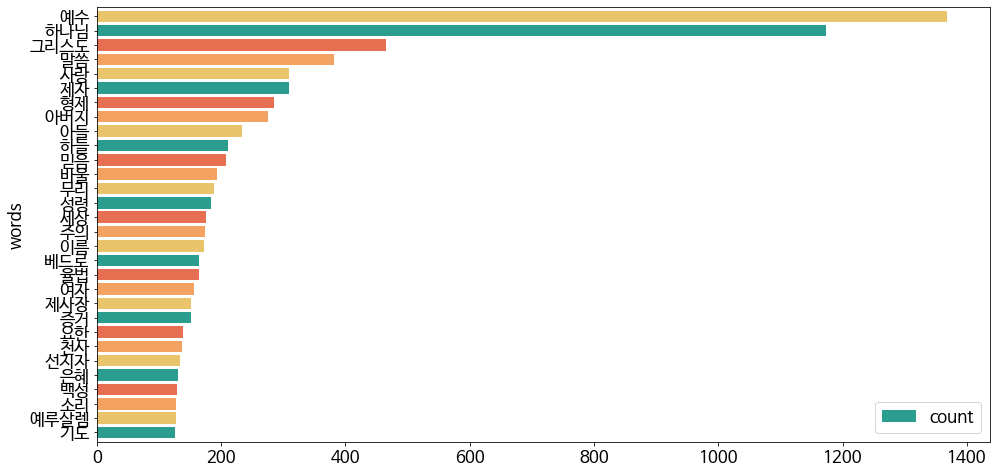

In [89]:
my_colors = ['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
word_freq = word_freq.sort_values(by=['count'], ascending=True) 
ax = word_freq.plot.barh(x='words', y='count',width=0.8, color=my_colors) 

#워드클라우드

In [42]:
from PIL import Image
import PIL.Image as pilimg
import matplotlib.pyplot as plt
import numpy as np

In [43]:
mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/감성분석_이명기/cross_1.jpg'))

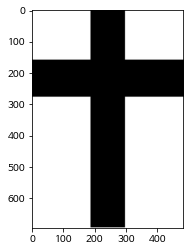

In [44]:
plt.imshow(mask)

In [45]:
stopword=stopword_wordcloud

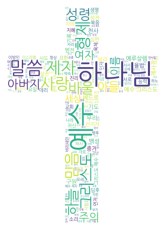

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path = "/content/drive/MyDrive/Colab Notebooks/감성분석_이명기/NanumGothic.otf",
                      background_color="white",
                      width=1600,height=1600,
                      stopwords=stopword_wordcloud,
                      mask=mask,
                      )
wordcloud = wordcloud.generate(listToString(words))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 동일 문장 빈도

In [47]:
#단어 동일문장 발생 메트릭스
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the indexm
    return co_occurrence_matrix, vocab_index

In [21]:
 # Create one list using many lists
matrix, vocab_index = generate_co_occurrence_matrix(words)
data_matrix = pd.DataFrame(matrix, index=vocab_index,columns=vocab_index)
word=list(data_matrix[data_matrix['하나님']>0]["하나님"].sort_values(ascending=False).index[:30])
freq=list(data_matrix[data_matrix['하나님']>0]["하나님"].sort_values(ascending=False)[:][:30])

In [22]:
replace=pd.DataFrame({'words':word,
                     'freq':freq})

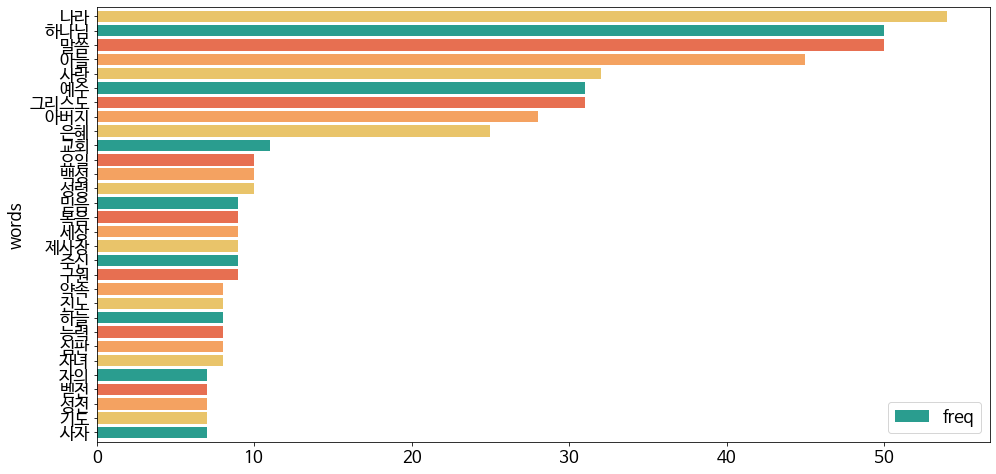

In [90]:
my_colors = ['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']
word_freq = replace.sort_values(by=['freq'], ascending=True) 
ax = word_freq.plot.barh(x='words', y='freq',width=0.8, color=my_colors) 